In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as graph

In [2]:
data = pd.read_csv('stock.csv')

dates = []

for i in list(data['Date']):
    dates.append([int(i.split('-')[0])])  # since SVR requires a 2D Matrix 
prices = []

for i in list(data['Open Price']):
    prices.append(int(i))

print(dates,prices, sep='\n')


[[1], [2], [3], [4], [5], [8], [9], [10], [11], [12], [15], [16], [17], [18], [19], [22], [23], [24], [25], [29], [30], [31]]
[2682, 2660, 2632, 2650, 2650, 2700, 2715, 2711, 2810, 2805, 2777, 2756, 2870, 2897, 2930, 2961, 3114, 3090, 3175, 3131, 3180, 3137]


# SVR Parameters

## C
Controls the tradeoff between smoothness of a line and getting data points correct.

Higher the value of C the more datapoints are correct but could lead to overfitting.

## Gamma

How much data points from far away influence the line

low value = Far
high value = Close

## Degree

Unknown

In [3]:
svr_engine_lin = SVR(kernel = 'linear',C = 1e2)
svr_engine_lin.fit(dates,prices)

SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
svr_engine_rbf = SVR(kernel = 'rbf',C = 1e3)
svr_engine_rbf.fit(dates,prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [6]:
svr_engine_poly = SVR(kernel = 'poly')
svr_engine_poly.fit(dates,prices)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

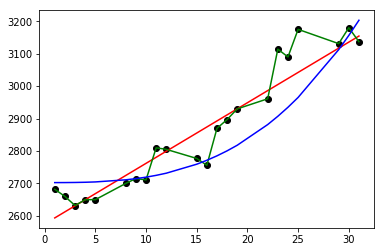

In [14]:
%matplotlib inline
graph.scatter(dates,prices,color='Black', label='Data')
graph.plot(dates, svr_engine_lin.predict(dates), color='Red', label='Linear Kernel')

graph.plot(dates, svr_engine_rbf.predict(dates), color='Green', label='rbf Kernel')

graph.plot(dates, svr_engine_poly.predict(dates), color='Blue', label='poly Kernel')

In [15]:
def predict_with_3(linear, rbf,poly, value):
    return linear.predict(value), rbf.predict(value),poly.predict(value)

In [18]:
predictions = predict_with_3(svr_engine_lin,svr_engine_rbf,svr_engine_poly,[[32],[33],[34]])
predictions

(array([ 3172.94,  3191.62,  3210.3 ]),
 array([ 2946.72472616,  2872.08264838,  2868.33357958]),
 array([ 3252.96885174,  3306.18961971,  3362.73563616]))

In [12]:
actual = 3,124.00